In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelCD01A_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/CD01A.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.479438
1,0.006279,0.219157
2,0.013343,0.531494
3,0.020407,0.167100
4,0.027471,0.062988
...,...,...
273,0.985867,0.010932
274,0.989006,0.031754
275,0.992931,0.010932
276,0.996070,0.010932


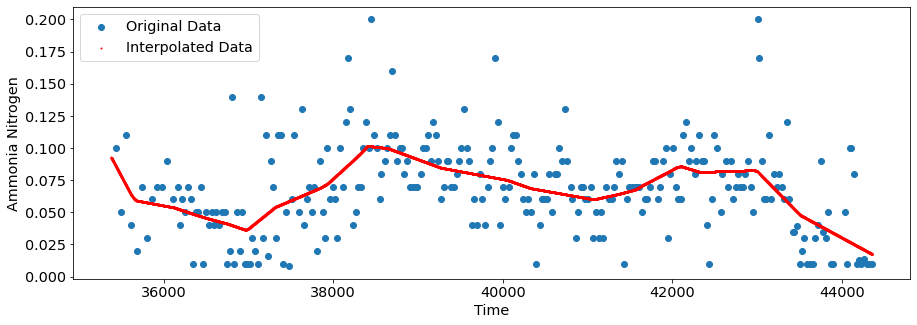

313/313 [==============================] - 0s 353us/step - loss: 2.9488e-16
['loss']


In [2]:
#Transform the normalized scale to real scale
AN_min = 0.0079
AN_max = 0.2
time_min = 35439.00          
time_max = 44357.44           

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.003363818
,0.009979327
,0.01681909
,0.023658853
,0.030498616
,0.037338379
,0.044290269
,0.050905778
,0.057745541
,0.064585304
,0.071425067
,0.078264831
,0.238718946
,0.951960475
,0.955324293
,0.958800238
])
interpolation

array([[0.38597777],
       [0.34802353],
       [0.30878267],
       [0.2763122 ],
       [0.26491842],
       [0.26104352],
       [0.25710505],
       [0.25335714],
       [0.24948221],
       [0.24560729],
       [0.24173233],
       [0.23704329],
       [0.27749184],
       [0.12972298],
       [0.12413725],
       [0.11836498]], dtype=float32)